<a href="https://colab.research.google.com/github/ManqiZhang0513/DLA3/blob/main/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


# Load the datasets
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
test_df = pd.read_csv('Google_Stock_Price_Test.csv')

# Display the first few rows of each dataset to understand the structure
train_df.info(), test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


(None, None)

In [2]:
train_df.describe(), test_df.describe()

(              Open         High          Low
 count  1258.000000  1258.000000  1258.000000
 mean    533.709833   537.880223   529.007409
 std     151.904442   153.008811   150.552807
 min     279.120000   281.210000   277.220000
 25%     404.115000   406.765000   401.765000
 50%     537.470000   540.750000   532.990000
 75%     654.922500   662.587500   644.800000
 max     816.680000   816.680000   805.140000,
              Open        High         Low       Close
 count   20.000000   20.000000   20.000000   20.000000
 mean   807.526000  811.926500  801.949500  807.904500
 std     15.125428   14.381198   13.278607   13.210088
 min    778.810000  789.630000  775.800000  786.140000
 25%    802.965000  806.735000  797.427500  802.282500
 50%    806.995000  808.640000  801.530000  806.110000
 75%    809.560000  817.097500  804.477500  810.760000
 max    837.810000  841.950000  827.010000  835.670000)

In [3]:
# Preprocessing the dataset

# Convert the 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%m/%d/%Y')
test_df['Date'] = pd.to_datetime(test_df['Date'], format='%m/%d/%Y')

# Remove commas and convert relevant columns to numeric
for feature in ['Open', 'High', 'Low', 'Close', 'Volume']:
    if train_df[feature].dtype == 'object':
        train_df[feature] = train_df[feature].str.replace(',', '').astype(float)
    if test_df[feature].dtype == 'object':
        test_df[feature] = test_df[feature].str.replace(',', '').astype(float)

# Extract the relevant columns for modeling (Open, High, Low, Close, Volume)
features = ['Open', 'High', 'Low', 'Close', 'Volume']



In [4]:
train_df.info(), test_df.info()
train_df.describe(), test_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   float64       
 5   Volume  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 59.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Open    20 non-null     float64       
 2   High    20 non-null     float64       
 3   Low     20 non-null     float64       
 4   Close   20 non-null     float64       
 5   Volume  20 non-null     float64       
dtypes: datetime64[ns](1), f

(                                Date         Open         High          Low  \
 count                           1258  1258.000000  1258.000000  1258.000000   
 mean   2014-07-03 20:00:45.786963456   533.709833   537.880223   529.007409   
 min              2012-01-03 00:00:00   279.120000   281.210000   277.220000   
 25%              2013-04-05 18:00:00   404.115000   406.765000   401.765000   
 50%              2014-07-05 00:00:00   537.470000   540.750000   532.990000   
 75%              2015-10-01 18:00:00   654.922500   662.587500   644.800000   
 max              2016-12-30 00:00:00   816.680000   816.680000   805.140000   
 std                              NaN   151.904442   153.008811   150.552807   
 
              Close        Volume  
 count  1258.000000  1.258000e+03  
 mean    712.669666  3.158107e+06  
 min     491.200000  7.900000e+03  
 25%     576.740000  1.621700e+06  
 50%     695.675000  2.566150e+06  
 75%     782.105000  4.122500e+06  
 max    1216.830000  2.497

In [5]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Split the training data into train and validation sets (70% train, 15% validation)
train_data, val_data = train_test_split(train_df[features].values, test_size=0.15, random_state=42, shuffle=False)

# Normalize the features using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)




In [6]:

# Define a function to create sliding windows for time series data
def create_dataset(data, look_back=5):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])  # Predicting the next day's data (Open, High, Low, Close, Volume)
    return np.array(X), np.array(y)

# Create sliding windows for train and validation sets
look_back = 5
X_train, y_train = create_dataset(train_data_scaled, look_back)
X_val, y_val = create_dataset(val_data_scaled, look_back)

# Define the Vanilla RNN model as baseline
vanilla_rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(look_back, 5)),
    Dense(5)  # Output layer to predict 'Open', 'High', 'Low', 'Close', 'Volume'
])

# Compile the Vanilla RNN model
vanilla_rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Vanilla RNN model
vanilla_rnn_history = vanilla_rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1221 - val_loss: 0.0076
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - val_loss: 0.0022
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - val_loss: 8.1276e-04
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 7.0015e-04
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 5.8950e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_loss: 6.4408e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 6.0355e-04
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 5.4002e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 5.2014e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_loss: 4.7160e-04
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 5.6586e-04
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Vanilla RNN Validation MSE: 0.0005851903193396589
Vanilla RNN Validation MAPE: 0.12742197306112632
Vanilla RNN Validation R^2: 0.6648300225533317


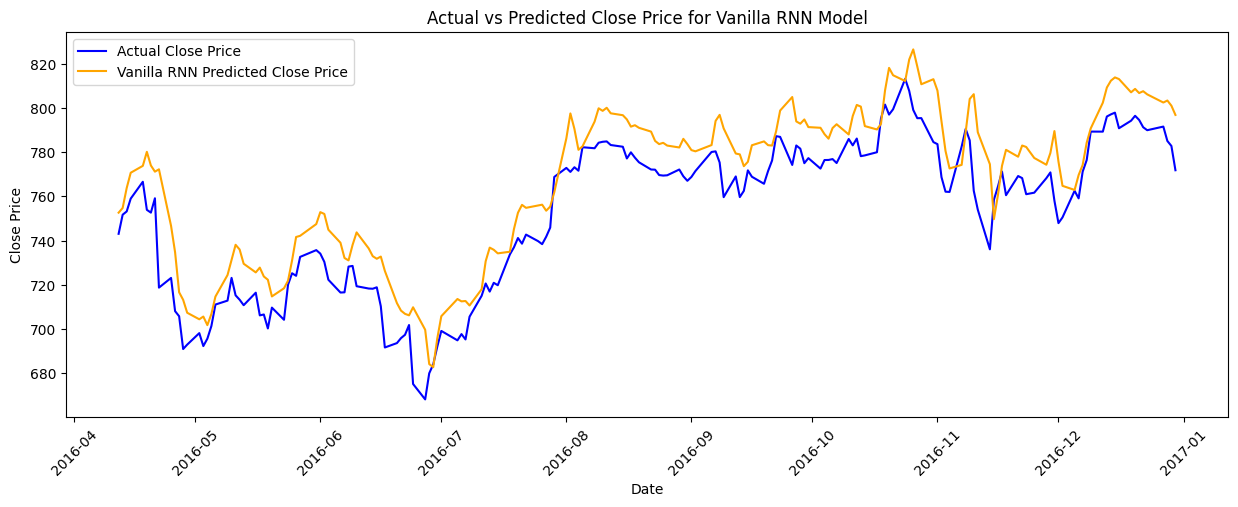

In [12]:
vanilla_rnn_val_predictions = vanilla_rnn_model.predict(X_val)
vanilla_rnn_mse = mean_squared_error(y_val, vanilla_rnn_val_predictions)
vanilla_rnn_r2 = r2_score(y_val, vanilla_rnn_val_predictions)
print(f'Vanilla RNN Validation MSE: {vanilla_rnn_mse}')
print(f'Vanilla RNN Validation R^2: {vanilla_rnn_r2}')

# Inverse transform the predictions and actual values
val_data_inverse = scaler.inverse_transform(y_val)
vanilla_rnn_val_predictions_inverse = scaler.inverse_transform(vanilla_rnn_val_predictions)

# Prepare date labels for the validation set
val_dates = train_df['Date'].iloc[-len(val_data_inverse):].values

# Plot the predicted vs actual values for each model
plt.figure(figsize=(15, 5))
plt.plot(val_dates, val_data_inverse[:, 3], label='Actual Close Price', color='blue')
plt.plot(val_dates, vanilla_rnn_val_predictions_inverse[:, 3], label='Vanilla RNN Predicted Close Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual vs Predicted Close Price for Vanilla RNN Model')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Define the GRU model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(look_back, 5)),
    Dense(5)  # Output layer to predict 'Open', 'High', 'Low', 'Close', 'Volume'
])

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate the GRU model
gru_val_predictions = gru_model.predict(X_val)
gru_val_mse = mean_squared_error(y_val, gru_val_predictions)
gru_val_r2 = r2_score(y_val, gru_val_predictions)
print(f'GRU Best Model Validation MSE: {gru_val_mse}')
print(f'GRU Best Model Validation R^2: {gru_val_r2}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1589 - val_loss: 0.0960
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0246 - val_loss: 0.0100
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - val_loss: 0.0014
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - val_loss: 0.0012
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - val_loss: 6.4515e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 6.1120e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 5.0061e-04
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 5.8246e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 5.3479e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 6.0919e-04
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 7.6081e-04
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

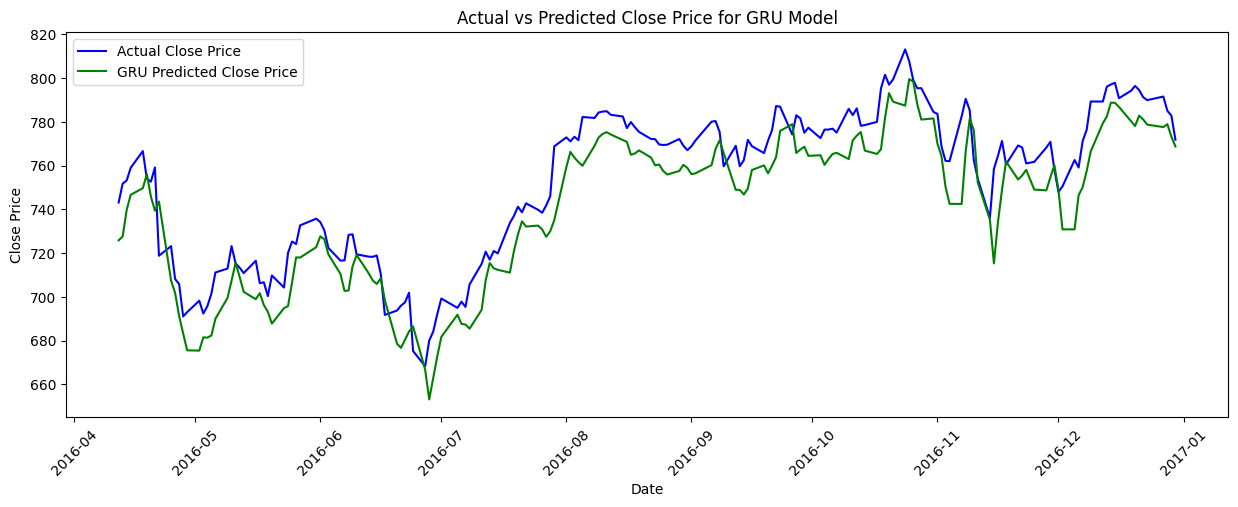

In [13]:
# Inverse transform the predictions and actual values
gru_val_predictions_inverse = scaler.inverse_transform(gru_val_predictions)

# Plot the predicted vs actual values for each model
plt.figure(figsize=(15, 5))
plt.plot(val_dates, val_data_inverse[:, 3], label='Actual Close Price', color='blue')
plt.plot(val_dates, gru_val_predictions_inverse[:, 3], label='GRU Predicted Close Price', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual vs Predicted Close Price for GRU Model')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(look_back, 5)),
    Dense(5)  # Output layer to predict 'Open', 'High', 'Low', 'Close', 'Volume'
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate the LSTM model
lstm_val_predictions = lstm_model.predict(X_val)
lstm_val_mse = mean_squared_error(y_val, lstm_val_predictions)
lstm_val_r2 = r2_score(y_val, lstm_val_predictions)
print(f'LSTM Best Model Validation MSE: {lstm_val_mse}')
print(f'LSTM Best Model Validation R^2: {lstm_val_r2}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1380 - val_loss: 0.0277
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - val_loss: 0.0020
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 8.6374e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 8.1927e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 8.9450e-04
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 8.6146e-04
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
LSTM Best Model Validation MSE: 0.0004905295463404026
LSTM Best Model Validation MAPE: 0.08429103964632133
LSTM Best Model Validation R^2: 0.7598665016557279


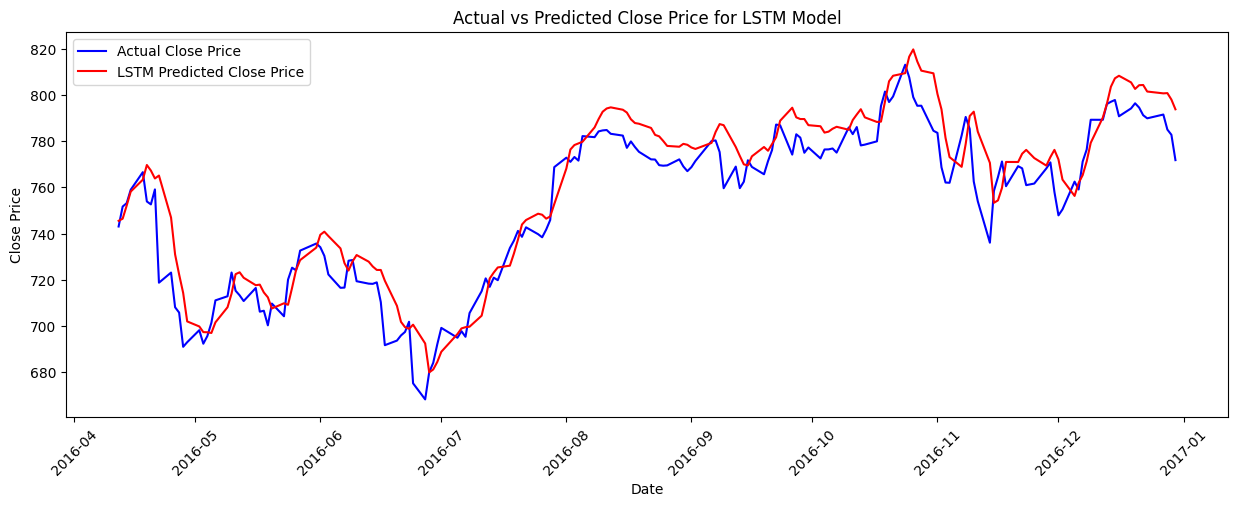

In [14]:
# Inverse transform the predictions and actual values
lstm_val_predictions_inverse = scaler.inverse_transform(lstm_val_predictions)

# Plot the predicted vs actual values for each model
plt.figure(figsize=(15, 5))
plt.plot(val_dates, val_data_inverse[:, 3], label='Actual Close Price', color='blue')
plt.plot(val_dates, lstm_val_predictions_inverse[:, 3], label='LSTM Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual vs Predicted Close Price for LSTM Model')
plt.xticks(rotation=45)
plt.show()

In [25]:

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define a function to create a GRU model for hyperparameter tuning
def build_gru_model(units=50, activation='relu', learning_rate=0.001, optimizer='adam'):
    model = Sequential([
        GRU(units, activation=activation, input_shape=(look_back, 5)),
        Dense(5)  # Output layer to predict 'Open', 'High', 'Low', 'Close', 'Volume'
    ])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the Keras model for use in scikit-learn
gru_model = KerasRegressor(
    model=build_gru_model,
    units=50,  # default value, will be overridden during GridSearch
    activation='relu',  # default value, will be overridden during GridSearch
    learning_rate=0.001,  # default value, will be overridden during GridSearch
    optimizer='adam',  # default value, will be overridden during GridSearch
    epochs=50,
    batch_size=32,
    verbose=0
)

# Define the grid of hyperparameters to search for GRU model
gru_param_grid = {
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.01, 0.001, 0.0001],
    'optimizer': ['adam', 'sgd']
}

# Perform Grid Search for GRU model

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

scoring = {'mse': mse_scorer, 'r2': r2_scorer}
gru_grid_search = GridSearchCV(estimator=gru_model, param_grid=gru_param_grid, cv=3, n_jobs=-1, return_train_score=False, scoring=scoring, refit='mse')
gru_grid_result = gru_grid_search.fit(X_train, y_train)


# Print all hyperparameter combinations and their corresponding MSE, MAPE, and R^2 scores
cv_results = gru_grid_result.cv_results_
for index in range(len(cv_results['params'])):
    params = cv_results['params'][index]
    mse = -cv_results['mean_test_mse'][index]  # mean_test_score is negative MSE in GridSearchCV
    r2 = cv_results['mean_test_r2'][index]
    print(f"Parameters: {params}, Mean Test MSE: {mse}, Mean Test R^2: {r2}")

# Print the best hyperparameters for GRU model
print("Best Hyperparameters for GRU Model: {}".format(gru_grid_result.best_params_))  # Output layer to predict 'Open', 'High', 'Low', 'Close', 'Volume'])


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Parameters: {'activation': 'relu', 'learning_rate': 0.01, 'optimizer': 'adam'}, Mean Test MSE: 0.0017319739591217032, Mean Test R^2: 0.8009412204021161
Parameters: {'activation': 'relu', 'learning_rate': 0.01, 'optimizer': 'sgd'}, Mean Test MSE: 0.002075795064295434, Mean Test R^2: 0.7511700884045727
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'adam'}, Mean Test MSE: 0.0017957777356861708, Mean Test R^2: 0.8106611982519177
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'sgd'}, Mean Test MSE: 0.0018672532537597523, Mean Test R^2: 0.7912898678316259
Parameters: {'activation': 'relu', 'learning_rate': 0.0001, 'optimizer': 'adam'}, Mean Test MSE: 0.003109825605479975, Mean Test R^2: 0.6257450312408727
Parameters: {'activation': 'relu', 'learning_rate': 0.0001, 'optimizer': 'sgd'}, Mean Test MSE: 0.005804356423507045, Mean Test R^2: 0.3624766589459496
Parameters: {'activation': 'tanh', 'learning_rate': 0.01, 'optimizer': 'adam'}, Mean Tes

In [26]:
# Define a function to create an LSTM model for hyperparameter tuning
def build_lstm_model(units=50, activation='relu', learning_rate=0.001, optimizer='adam'):
    model = Sequential([
        LSTM(units, activation=activation, input_shape=(look_back, 5)),
        Dense(5)  # Output layer to predict 'Open', 'High', 'Low', 'Close', 'Volume'
    ])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the Keras model for use in scikit-learn
lstm_model = KerasRegressor(build_fn=build_lstm_model,
    units=50,  # default value, will be overridden during GridSearch
    activation='relu',  # default value, will be overridden during GridSearch
    learning_rate=0.001,  # default value, will be overridden during GridSearch
    optimizer='adam',  # default value, will be overridden during GridSearch
    epochs=50,
    batch_size=32,
    verbose=0
)

# Define the grid of hyperparameters to search for LSTM model
lstm_param_grid = {
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.01, 0.001, 0.0001],
    'optimizer': ['adam', 'sgd']
}

# Perform Grid Search for LSTM model
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

lstm_grid_search = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, n_jobs=-1, return_train_score=False, scoring=scoring, refit='mse')
lstm_grid_result = lstm_grid_search.fit(X_train, y_train)

# Print all hyperparameter combinations and their corresponding MSE, MAPE, and R^2 scores
lstm_cv_results = lstm_grid_result.cv_results_
for index in range(len(lstm_cv_results['params'])):
    params = lstm_cv_results['params'][index]
    mse = -lstm_cv_results['mean_test_mse'][index]  # mean_test_score is negative MSE in GridSearchCV
    r2 = lstm_cv_results['mean_test_r2'][index]
    print(f"Parameters: {params}, Mean Test MSE: {mse}, Mean Test R^2: {r2}")

# Print the best hyperparameters for LSTM model
print("Best Hyperparameters for LSTM Model: {}".format(lstm_grid_result.best_params_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Parameters: {'activation': 'relu', 'learning_rate': 0.01, 'optimizer': 'adam'}, Mean Test MSE: 0.001987552147232936, Mean Test R^2: 0.7867635777753549
Parameters: {'activation': 'relu', 'learning_rate': 0.01, 'optimizer': 'sgd'}, Mean Test MSE: 0.00190167618861585, Mean Test R^2: 0.801479208918785
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'adam'}, Mean Test MSE: 0.0029105091398067867, Mean Test R^2: 0.739224023288337
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'sgd'}, Mean Test MSE: 0.0026118866352937476, Mean Test R^2: 0.7296306730294728
Parameters: {'activation': 'relu', 'learning_rate': 0.0001, 'optimizer': 'adam'}, Mean Test MSE: 0.006546277195683191, Mean Test R^2: 0.30258431800750996
Parameters: {'activation': 'relu', 'learning_rate': 0.0001, 'optimizer': 'sgd'}, Mean Test MSE: 0.007895875467736582, Mean Test R^2: 0.24481176516534675
Parameters: {'activation': 'tanh', 'learning_rate': 0.01, 'optimizer': 'adam'}, Mean Test 

GRU Best Model Validation R^2: 0.9970084127219555
Best GRU Model Validation MSE: 0.0004211096210644838
LSTM Best Model Validation R^2: 0.9976100633447089
Best LSTM Model Validation MSE: 0.0003364185048733167


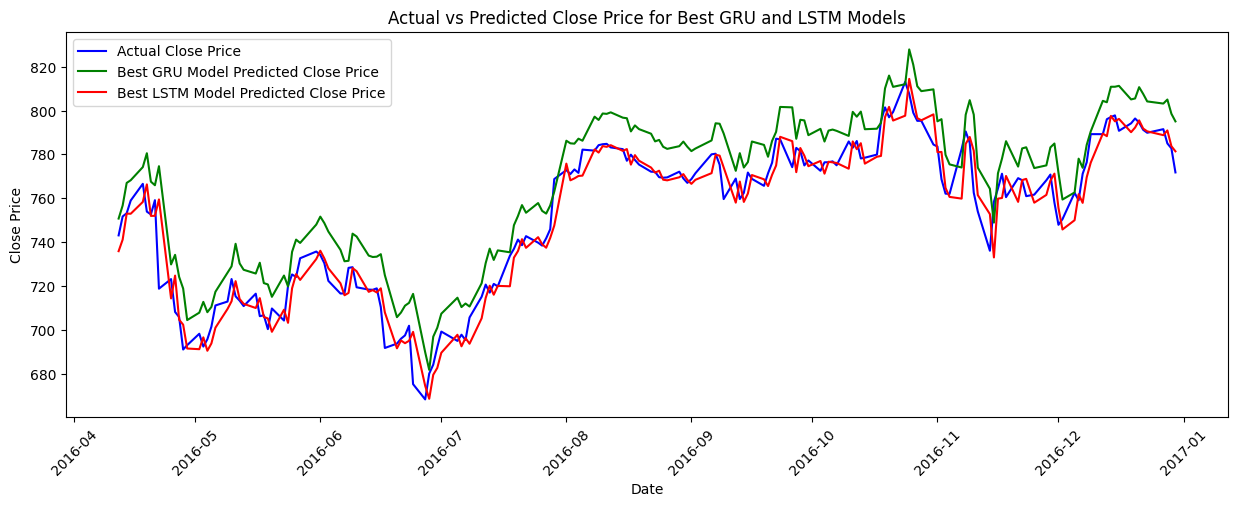

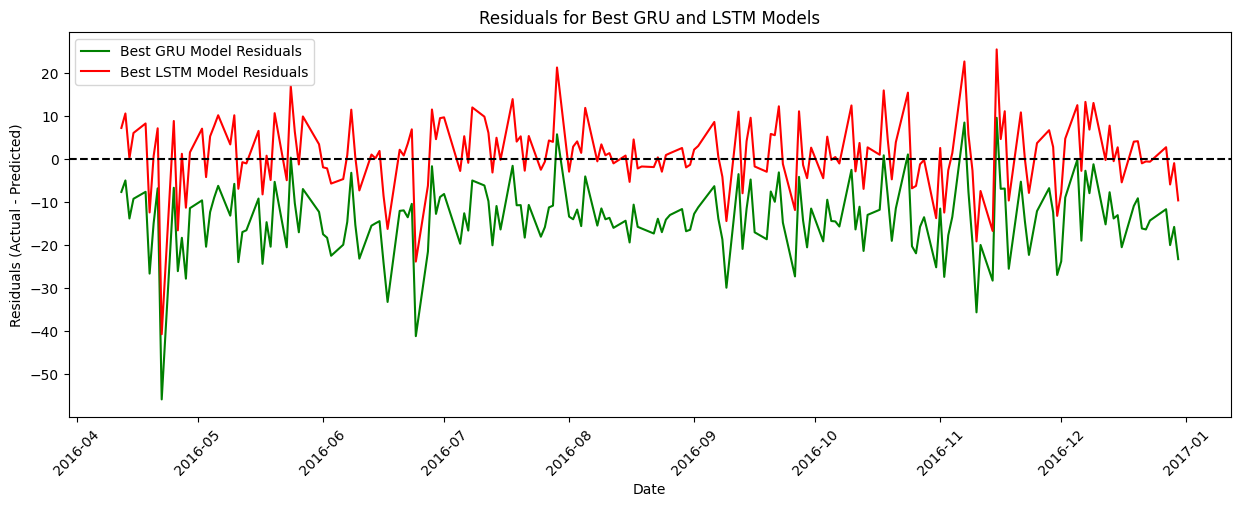

In [28]:
# Evaluate the best GRU model on the validation set
gru_best_model = gru_grid_result.best_estimator_
gru_val_predictions = gru_best_model.predict(X_val)
gru_mse = mean_squared_error(y_val, gru_val_predictions)
gru_val_r2 = 1 - (np.sum((y_val - gru_val_predictions) ** 2) / np.sum((y_val - np.mean(y_val)) ** 2))
print(f'GRU Best Model Validation R^2: {gru_val_r2}')
print(f'Best GRU Model Validation MSE: {gru_mse}')

# Evaluate the best LSTM model on the validation set
lstm_best_model = lstm_grid_result.best_estimator_
lstm_val_predictions = lstm_best_model.predict(X_val)
lstm_mse = mean_squared_error(y_val, lstm_val_predictions)
lstm_val_r2 = 1 - (np.sum((y_val - lstm_val_predictions) ** 2) / np.sum((y_val - np.mean(y_val)) ** 2))
print(f'LSTM Best Model Validation R^2: {lstm_val_r2}')
print(f'Best LSTM Model Validation MSE: {lstm_mse}')
# Inverse transform the predictions and actual values
val_data_inverse = scaler.inverse_transform(y_val)
gru_val_predictions_inverse = scaler.inverse_transform(gru_val_predictions.reshape(-1, 5))
lstm_val_predictions_inverse = scaler.inverse_transform(lstm_val_predictions.reshape(-1, 5))

# Prepare date labels for the validation set
val_dates = train_df['Date'].iloc[-len(val_data_inverse):].values

# Plot the predicted vs actual values for the best models
plt.figure(figsize=(15, 5))
plt.plot(val_dates, val_data_inverse[:, 3], label='Actual Close Price', color='blue')
plt.plot(val_dates, gru_val_predictions_inverse[:, 3], label='Best GRU Model Predicted Close Price', color='green')
plt.plot(val_dates, lstm_val_predictions_inverse[:, 3], label='Best LSTM Model Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual vs Predicted Close Price for Best GRU and LSTM Models')
plt.xticks(rotation=45)
plt.show()

# Plot residuals for the best models
gru_residuals = val_data_inverse[:, 3] - gru_val_predictions_inverse[:, 3]
lstm_residuals = val_data_inverse[:, 3] - lstm_val_predictions_inverse[:, 3]

plt.figure(figsize=(15, 5))
plt.plot(val_dates, gru_residuals, label='Best GRU Model Residuals', color='green')
plt.plot(val_dates, lstm_residuals, label='Best LSTM Model Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.title('Residuals for Best GRU and LSTM Models')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Evaluate the best GRU model on the test set
X_test, y_test = create_dataset(scaler.transform(test_df[features].values), look_back)
gru_test_predictions = gru_best_model.predict(X_test)
gru_test_mse = mean_squared_error(y_test, gru_test_predictions)
gru_test_r2 = 1 - (np.sum((y_test - gru_test_predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print(f'GRU Best Model Validation R^2: {gru_test_r2}')
print(f'Best GRU Model Validation MSE: {gru_test_mse}')


GRU Best Model Validation R^2: 0.9974938501293535
Best GRU Model Validation MSE: 0.00042846420965850706


GRU Best Model Test MSE: 0.00042846420965850706


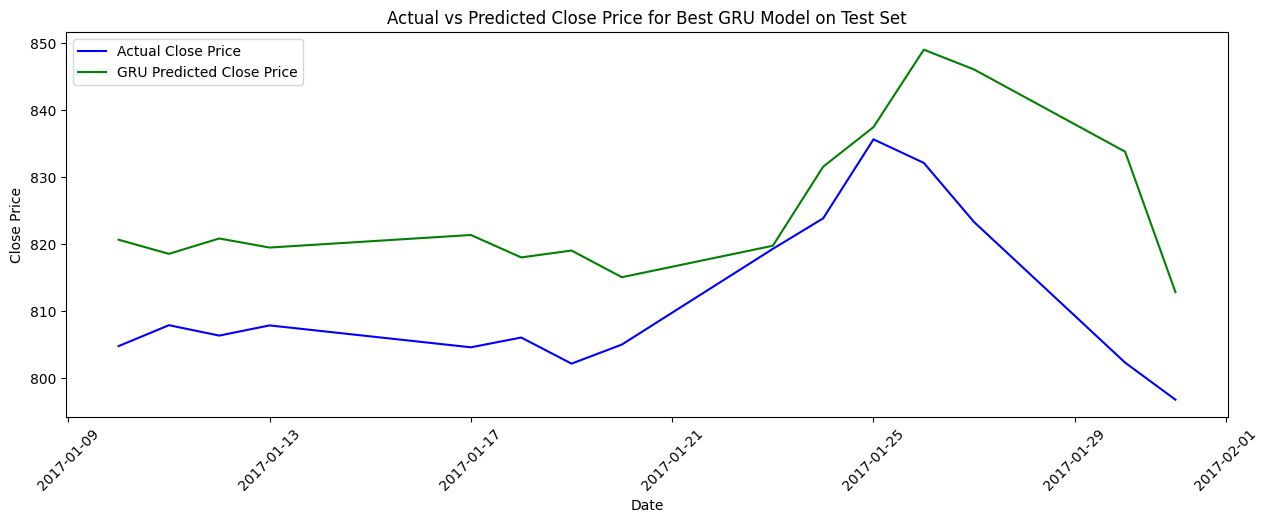

In [30]:
# Evaluate the best GRU model on the test set
X_test, y_test = create_dataset(scaler.transform(test_df[features].values), look_back)
if X_test.size > 0:
    gru_test_predictions = gru_best_model.predict(X_test)
    gru_test_mse = mean_squared_error(y_test, gru_test_predictions)
    print(f'GRU Best Model Test MSE: {gru_test_mse}')

    # Plot the predicted vs actual values for the best GRU model on the test set
    plt.figure(figsize=(15, 5))
    test_dates = test_df['Date'][look_back:].values
    y_test_inverse = scaler.inverse_transform(y_test)
    gru_test_predictions_inverse = scaler.inverse_transform(gru_test_predictions)

    plt.plot(test_dates, y_test_inverse[:, 3], label='Actual Close Price', color='blue')
    plt.plot(test_dates, gru_test_predictions_inverse[:, 3], label='GRU Predicted Close Price', color='green')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.title('Actual vs Predicted Close Price for Best GRU Model on Test Set')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No test data available for evaluation.")

In [32]:
# Evaluate the best LSTM model on the test set
lstm_test_predictions = lstm_best_model.predict(X_test)
lstm_test_mse = mean_squared_error(y_test, lstm_test_predictions)
lstm_test_r2 = 1 - (np.sum((y_test - lstm_test_predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print(f'lstm Best Model Validation R^2: {lstm_test_r2}')
print(f'Best lstm Model Validation MSE: {lstm_test_mse}')

lstm Best Model Validation R^2: 0.9983324631658291
Best lstm Model Validation MSE: 0.000285090632486869


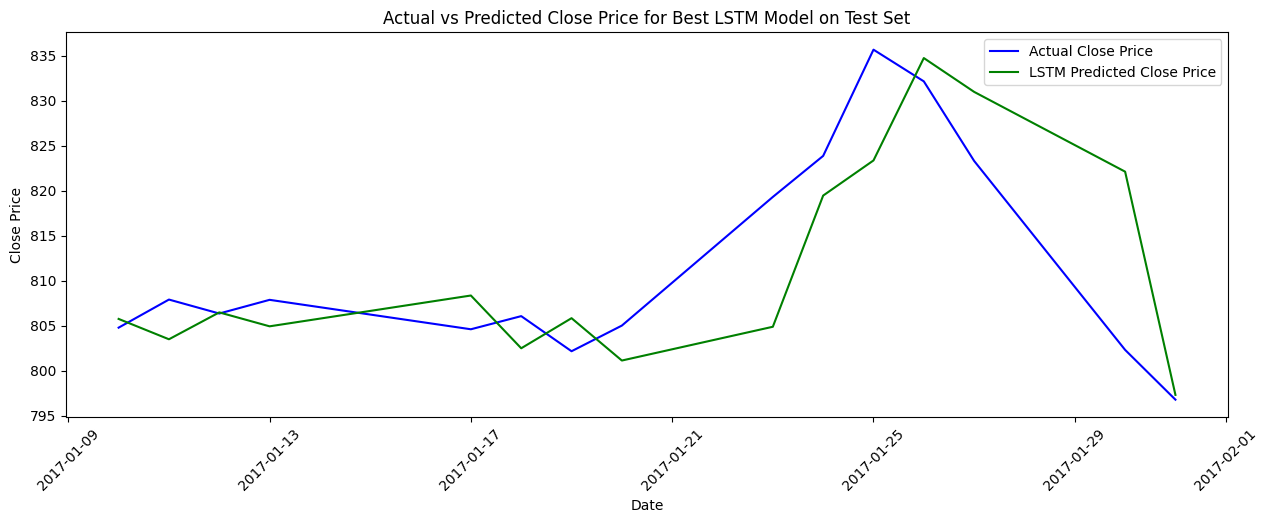

In [33]:
# Plot the predicted vs actual values for the best GRU model on the test set
plt.figure(figsize=(15, 5))
test_dates = test_df['Date'][look_back:].values
lstm_test_predictions_inverse = scaler.inverse_transform(lstm_test_predictions)

plt.plot(test_dates, y_test_inverse[:, 3], label='Actual Close Price', color='blue')
plt.plot(test_dates, lstm_test_predictions_inverse[:, 3], label='LSTM Predicted Close Price', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual vs Predicted Close Price for Best LSTM Model on Test Set')
plt.xticks(rotation=45)
plt.show()
